In [539]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats 
%matplotlib inline
import random

In [540]:
def sigmoid(z):
    return 1./(1+np.exp(-z))
def der_sigmoid(z):
    return (1./(1+np.exp(-z)))*(1-(1./(1+np.exp(-z))))

In [541]:


def diff_log_loss(t, y):
    
    return np.sum(-(t/y) -(t -1)/(1-y), keepdims=True)
def log_loss(t, y):
    return np.sum((-t*np.log(y) - (1 - t) * (np.log(1 - y))), keepdims=True).flatten()


In [574]:
class Layer: #слой реализован в виде класса
  
    
    def __init__(self, n_inp, hidden, n_out, lr=0.1):
        self.shape = (n_inp, n_out) #залетают входящие и выходящие значения
        self.lr = lr #шаг обучения
        self.w1 = np.zeros((n_inp, hidden), dtype=np.float32) #веса в начале заданы нулями
        self.b1 = np.zeros((1, n_out), dtype=np.float32) #смещения в начале заданы нулями
        self.w2 = np.zeros((hidden, n_out), dtype=np.float32) #веса в начале заданы нулями
        self.b2 = np.zeros((1, n_out), dtype=np.float32) #смещения в начале заданы нулями
        self._clear_grads() #проход обычного градиентного спуска

    def _clear_grads(self): #градиентный спуск
        self.inp = None
        self.activations1 = None
        self.activations2 = None
        self.d_sigma1 = None
        self.d_sigma2 = None
        self.d_w1 = None
        self.d_b1 = None
        self.d_w2 = None
        self.d_b2 = None

    def __call__(self, x): #вызов класса
        if len(x.shape) == 1: #если входящие значения одноразмерны - сменить размерность
            x = x.reshape(1, -1)
        self.inp = x #задаем входные значения
        self.activations1 = sigmoid(x.astype(np.float64).dot(self.w1) + self.b1) #запуск функции с функцией активации
        self.activations2 = sigmoid(self.activations1.astype(np.float64).dot(self.w2) + self.b2)
        return self.activations2

    def backward(self, grad): # обратный проход
        self.d_sigma2 = self.activations2 * (1 - self.activations2) #производная функции ошибки 
        self.d_w2 = self.grad_w2(grad)
        self.d_b2 = self.grad_b2(grad)
        self.d_sigma1 = self.activations1 * (1 - self.activations1)
        zuzu = self.grad_x2(grad)
        self.d_w1 = self.grad_w1(zuzu)
        self.d_b1 = self.grad_b1(zuzu)
        return self.grad_x1(zuzu)
    def grad_w1(self, grad):
        return grad * self.inp.T * self.d_sigma1

    def grad_b1(self, grad):
        return grad * self.d_sigma1

    def grad_x1(self, grad):
        return self.w1.dot(grad) * self.d_sigma1
    
    def grad_w2(self, grad):
        return grad.dot(self.activations1.T) * self.d_sigma2

    def grad_b2(self, grad):
        return grad * self.d_sigma2

    def grad_x2(self, grad):
        return self.w2.dot(grad) * self.d_sigma2

    def step(self):
        self.w1 -= self.d_w1 * self.lr
        self.b1 -= self.d_b1 * self.lr
        self.w2 -= self.d_w2 * self.lr
        self.b2 -= self.d_b2 * self.lr
        self._clear_grads()
        #return(self.w, self.b)


In [575]:

l1 = Layer(1, 1, 1) #слой1 
#l2 = Layer(1,1) #слой2


In [576]:
list_of_distr = [1, 0]
list_of_distr

[1, 0]

In [579]:
pipi =[]
pupu =[]
for i in range(200000):
    
    t = random.choice(list_of_distr)
    if t == 1:
        x = np.random.normal(1.5, 1.0, (1,1))
        pipi.append(x)
    else:
        x = np.random.normal(-1.5, 1.0, (1,1))
        pupu.append(x)
    y = l1(x)
    d_y = diff_log_loss(t, y)
        #print(d_y)
    l1.backward(d_y)
    l1.step()
print(log_loss(t,y))

[0.0101717]


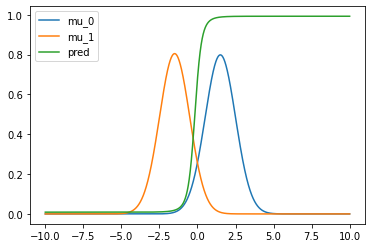

In [582]:
x_scale = np.linspace(-10, 10, 5000)
predictor = []
for line in x_scale:
    x = np.array(line)
    predictor.append(l1(x))
predictor = np.array(predictor)
predictor.reshape(5000,1)
h = pipi
h.sort()
hmean = np.mean(h) 
hstd = np.std(h) 
mu0_pdf = stats.norm.pdf(x_scale, hmean, hstd)
plt.plot(x_scale, mu0_pdf*2, label='mu_0')
h = pupu
h.sort()
hmean = np.mean(h) 
hstd = np.std(h) 
mu1_pdf = stats.norm.pdf(x_scale, hmean, hstd) 
plt.plot(x_scale,  mu1_pdf*2, label='mu_1')
plt.plot(x_scale, predictor.flatten() , label='pred')
plt.legend()